In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import statsmodels.api as sm
from influxdb import DataFrameClient

In [2]:
plt.rcParams['figure.figsize'] = [20, 15]

In [3]:
df = pd.read_csv('/home/ict4bd/Residential_oslo/simulation_data/simulation_Data_ES.csv', parse_dates=[0,], index_col='Date_Time')


In [4]:
df.columns

Index(['t_in', 't_out', 'temp_diff', 'power_heating', 'power_cooling',
       'power_electricity', 'total_power'],
      dtype='object')

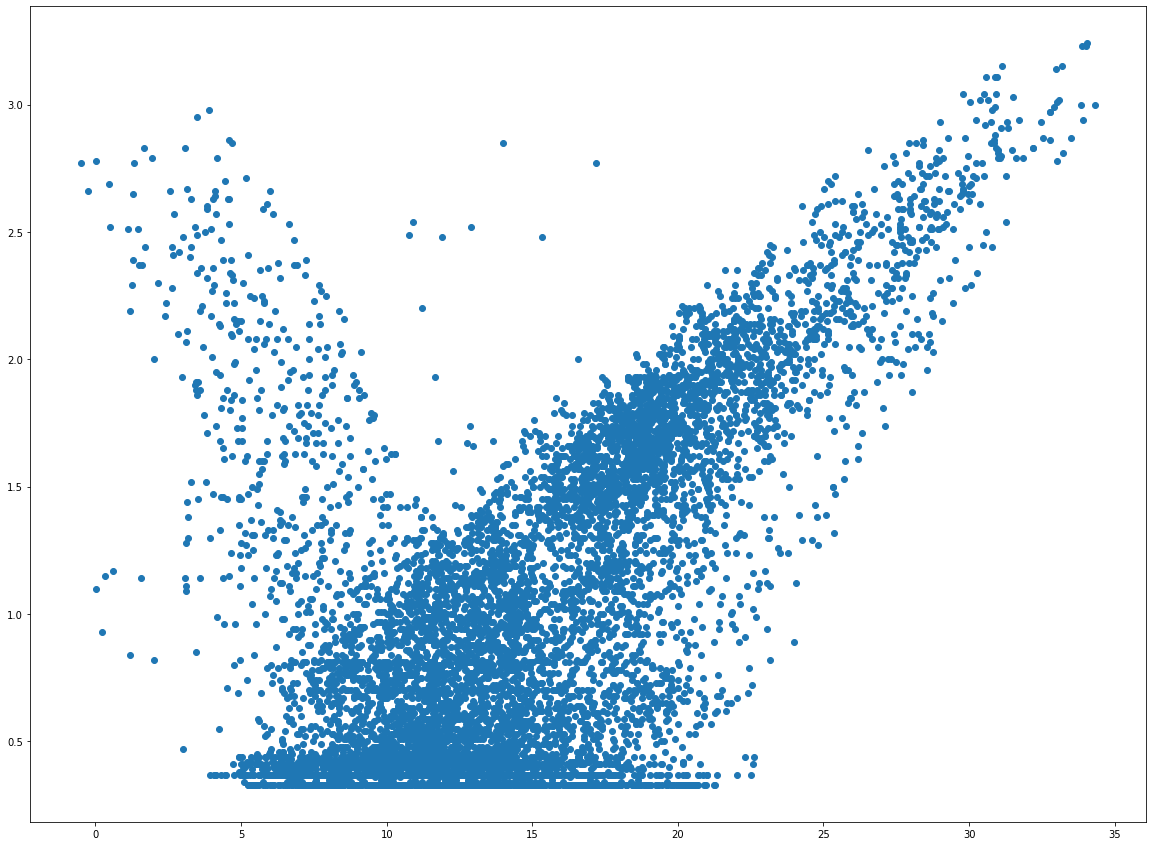

In [5]:
plt.scatter(df.temp_diff,df.total_power)

In [6]:
clean_cool = df.where(df['power_cooling']>=0.1).dropna()
clean_heat = df.where(df['power_heating']!=0.0).dropna()

In [7]:
model_c = sm.OLS(clean_cool.power_cooling,sm.add_constant(clean_cool.temp_diff))
model_h = sm.OLS(clean_heat.power_heating,sm.add_constant(clean_heat.temp_diff))

In [8]:
results_c = model_c.fit()
results_h = model_h.fit()

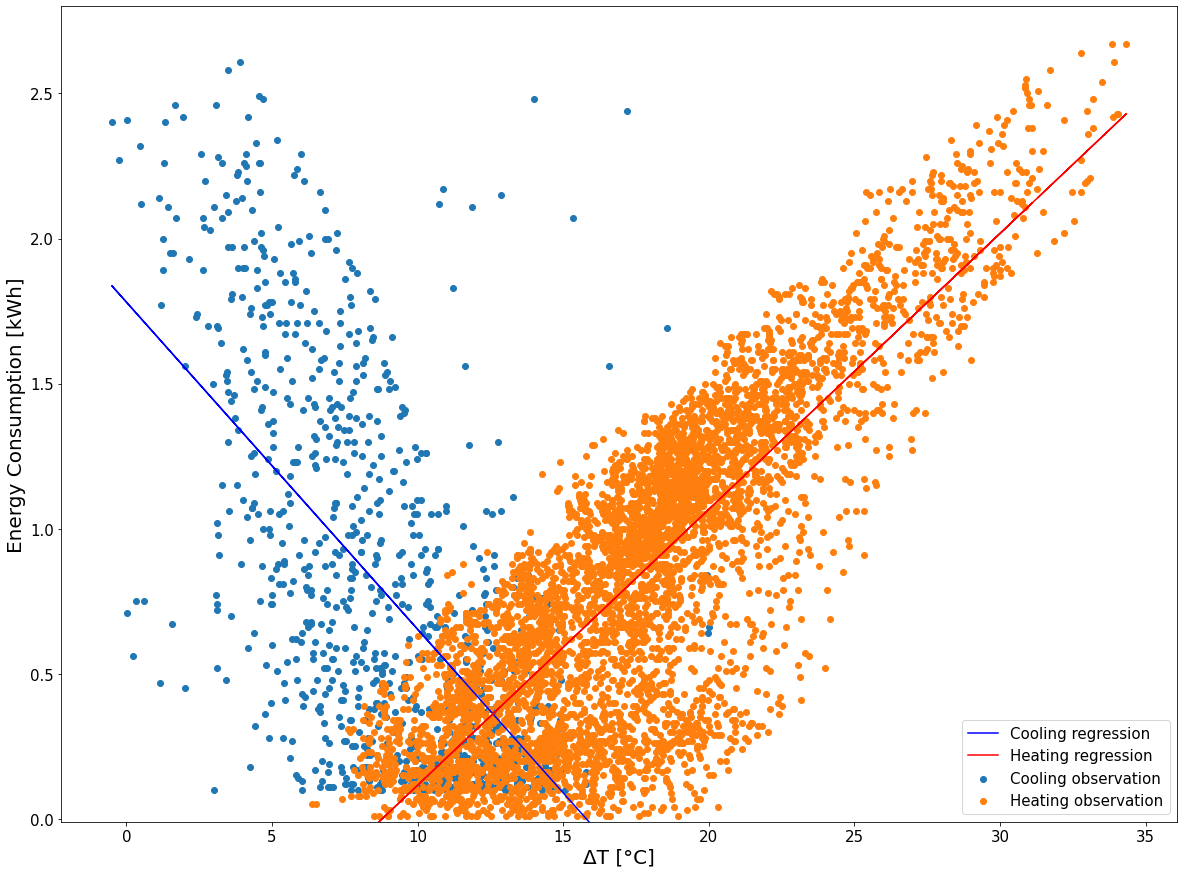

In [9]:
fig = plt.figure()
plt.plot(clean_cool.temp_diff,results_c.predict(),'b', label="Cooling regression")
plt.plot(clean_heat.temp_diff,results_h.predict(),'r', label="Heating regression")
plt.scatter(clean_cool.temp_diff,clean_cool.power_cooling, label="Cooling observation")
plt.scatter(clean_heat.temp_diff,clean_heat.power_heating, label="Heating observation")
plt.xlabel('\u0394T [\u00B0C]', fontsize = 20)
plt.ylabel('Energy Consumption [kWh]', fontsize = 20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(-0.01, 2.80)
plt.legend(loc='lower right', fontsize=15)

In [10]:
results_h.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          power_heating   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                 1.109e+04
Date:                Thu, 14 Jan 2021   Prob (F-statistic):               0.00
Time:                        17:33:45   Log-Likelihood:                -1182.6
No. Observations:                5001   AIC:                             2369.
Df Residuals:                    4999   BIC:                             2382.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8347      0.016    -50.725      0.000      -0.867      -0.802
temp_diff      0.0951      0.001    105.297      0.000       0.093       0.097
==============================================================================
Omnibus:                      408.388   Durbin-Watson:                   0.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              514.043
Skew:                          -0.781   Prob(JB):                    2.38e-112
Kurtosis:                       3.166   Cond. No.                         69.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
results_c.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          power_cooling   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     562.3
Date:                Thu, 14 Jan 2021   Prob (F-statistic):           3.33e-99
Time:                        17:33:45   Log-Likelihood:                -771.30
No. Observations:                1014   AIC:                             1547.
Df Residuals:                    1012   BIC:                             1556.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7811      0.045     39.177      0.000       1.692       1.870
temp_diff     -0.1127      0.005    -23.712      0.000      -0.122      -0.103
==============================================================================
Omnibus:                       94.294   Durbin-Watson:                   0.192
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              130.988
Skew:                           0.721   Prob(JB):                     3.60e-29
Kurtosis:                       4.012   Cond. No.                         27.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
clean_cool=clean_cool.resample('D').mean()
clean_heat=clean_heat.resample('D').mean()
clean_cool=clean_cool.dropna()
clean_heat=clean_heat.dropna()

In [13]:
model_c = sm.OLS(clean_cool.power_cooling,sm.add_constant(clean_cool.temp_diff))
model_h = sm.OLS(clean_heat.power_heating,sm.add_constant(clean_heat.temp_diff))

In [14]:
results_c = model_c.fit()
results_h = model_h.fit()

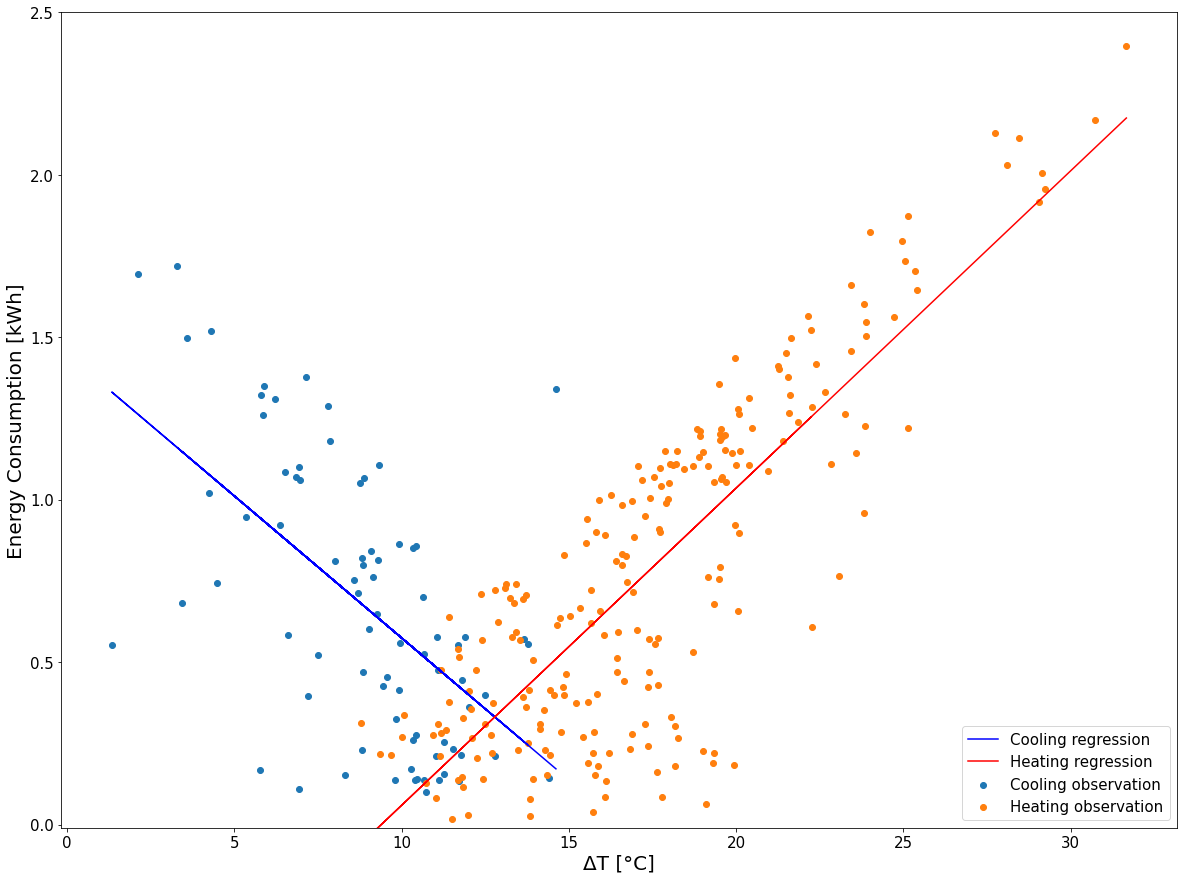

In [15]:
fig = plt.figure()
plt.plot(clean_cool.temp_diff,results_c.predict(),'b', label="Cooling regression")
plt.plot(clean_heat.temp_diff,results_h.predict(),'r', label="Heating regression")
plt.scatter(clean_cool.temp_diff,clean_cool.power_cooling, label="Cooling observation")
plt.scatter(clean_heat.temp_diff,clean_heat.power_heating, label="Heating observation")
plt.xlabel('\u0394T [\u00B0C]', fontsize = 20)
plt.ylabel('Energy Consumption [kWh]', fontsize = 20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(-0.01, 2.5)
plt.legend(loc='lower right', fontsize=15)

In [16]:
results_h.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          power_heating   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     484.9
Date:                Thu, 14 Jan 2021   Prob (F-statistic):           4.68e-58
Time:                        17:33:46   Log-Likelihood:                -40.865
No. Observations:                 227   AIC:                             85.73
Df Residuals:                     225   BIC:                             92.58
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9174      0.080    -11.517      0.000      -1.074      -0.760
temp_diff      0.0977      0.004     22.020      0.000       0.089       0.106
==============================================================================
Omnibus:                       24.122   Durbin-Watson:                   0.396
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.319
Skew:                          -0.879   Prob(JB):                     4.30e-07
Kurtosis:                       3.083   Cond. No.                         74.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
results_c.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          power_cooling   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.317
Method:                 Least Squares   F-statistic:                     37.28
Date:                Thu, 14 Jan 2021   Prob (F-statistic):           3.87e-08
Time:                        17:33:46   Log-Likelihood:                -29.349
No. Observations:                  79   AIC:                             62.70
Df Residuals:                      77   BIC:                             67.44
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4483      0.133     10.855      0.000       1.183       1.714
temp_diff     -0.0874      0.014     -6.106      0.000      -0.116      -0.059
==============================================================================
Omnibus:                        1.292   Durbin-Watson:                   1.526
Prob(Omnibus):                  0.524   Jarque-Bera (JB):                0.719
Skew:                           0.165   Prob(JB):                        0.698
Kurtosis:                       3.332   Cond. No.                         31.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
clean_cool=clean_cool.resample('W').mean()
clean_heat=clean_heat.resample('W').mean()
clean_cool=clean_cool.dropna()
clean_heat=clean_heat.dropna()

In [19]:
model_c = sm.OLS(clean_cool.power_cooling,sm.add_constant(clean_cool.temp_diff))
model_h = sm.OLS(clean_heat.power_heating,sm.add_constant(clean_heat.temp_diff))

In [20]:
results_c = model_c.fit()
results_h = model_h.fit()

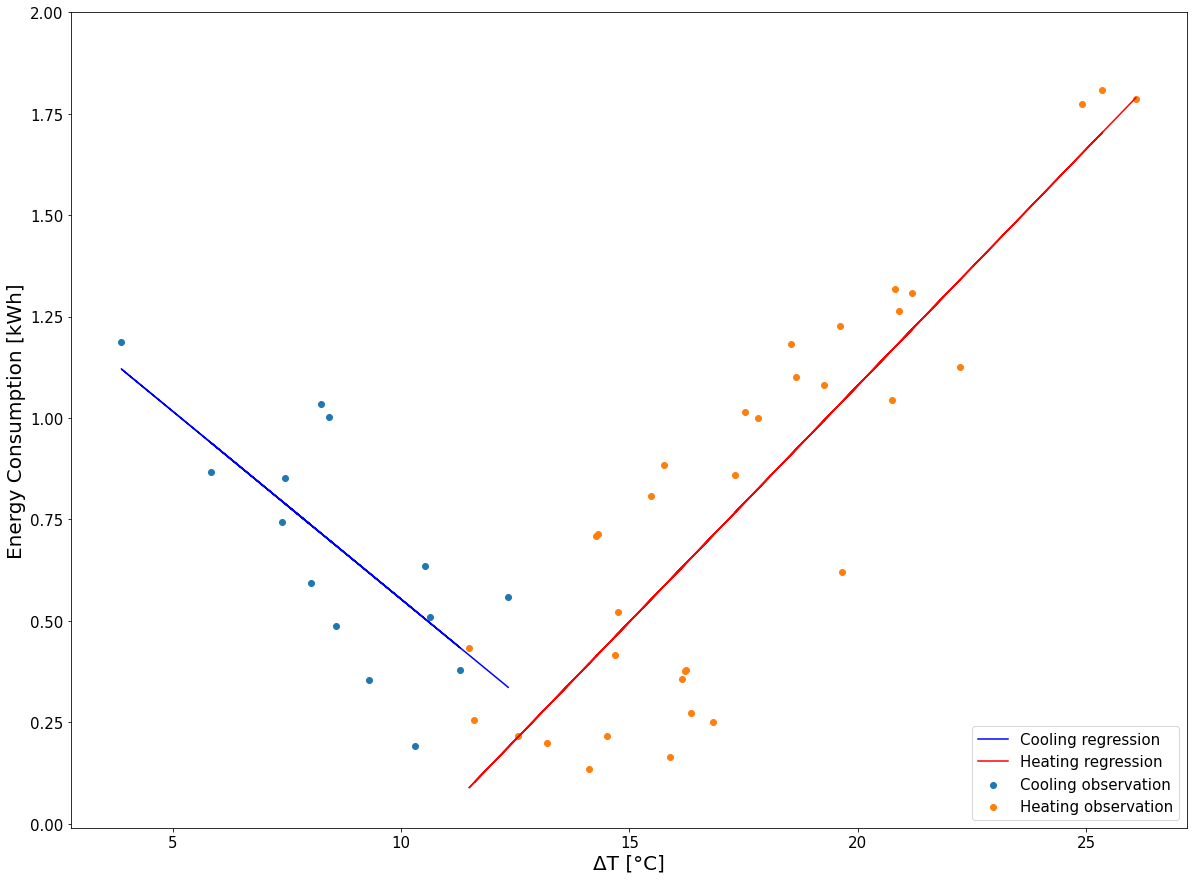

In [21]:
fig = plt.figure()
plt.plot(clean_cool.temp_diff,results_c.predict(),'b', label="Cooling regression")
plt.plot(clean_heat.temp_diff,results_h.predict(),'r', label="Heating regression")
plt.scatter(clean_cool.temp_diff,clean_cool.power_cooling, label="Cooling observation")
plt.scatter(clean_heat.temp_diff,clean_heat.power_heating, label="Heating observation")
plt.xlabel('\u0394T [\u00B0C]', fontsize = 20)
plt.ylabel('Energy Consumption [kWh]', fontsize = 20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(-0.01, 2.00)
plt.legend(loc='lower right', fontsize=15)

In [22]:
results_h.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          power_heating   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     105.1
Date:                Thu, 14 Jan 2021   Prob (F-statistic):           1.23e-11
Time:                        17:33:46   Log-Likelihood:                0.73666
No. Observations:                  34   AIC:                             2.527
Df Residuals:                      32   BIC:                             5.579
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2499      0.203     -6.150      0.000      -1.664      -0.836
temp_diff      0.1165      0.011     10.252      0.000       0.093       0.140
==============================================================================
Omnibus:                        4.543   Durbin-Watson:                   0.473
Prob(Omnibus):                  0.103   Jarque-Bera (JB):                2.661
Skew:                          -0.469   Prob(JB):                        0.264
Kurtosis:                       2.001   Cond. No.                         87.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
results_c.summary()

/home/ict4bd/py3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          power_cooling   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                     12.97
Date:                Thu, 14 Jan 2021   Prob (F-statistic):            0.00364
Time:                        17:33:46   Log-Likelihood:                 3.1888
No. Observations:                  14   AIC:                            -2.378
Df Residuals:                      12   BIC:                            -1.099
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4800      0.231      6.397      0.000       0.976       1.984
temp_diff     -0.0926      0.026     -3.602      0.004      -0.149      -0.037
==============================================================================
Omnibus:                        0.363   Durbin-Watson:                   1.409
Prob(Omnibus):                  0.834   Jarque-Bera (JB):                0.478
Skew:                           0.063   Prob(JB):                        0.787
Kurtosis:                       2.103   Cond. No.                         37.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""